In [7]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime as data
import mplfinance as mpf
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df

,Date,Open,High,Low,Close,Volume
0,2000.01.03,1.00730,1.02780,1.00540,1.02460,6642
1,2000.01.04,1.02430,1.03400,1.02130,1.02920,7339
2,2000.01.05,1.02930,1.04020,1.02840,1.03260,6570
3,2000.01.06,1.03250,1.04150,1.02720,1.03300,7223
4,2000.01.07,1.03290,1.03320,1.02600,1.02980,5689
...,...,...,...,...,...,...
5194,2019.12.24,1.10895,1.10939,1.10690,1.10851,22030
5195,2019.12.26,1.10900,1.11088,1.10820,1.10974,10530
5196,2019.12.27,1.10973,1.11882,1.10940,1.11760,36676
5197,2019.12.30,1.11754,1.12206,1.11713,1.11985,36372


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5199 non-null   object 
 1   Open    5199 non-null   float64
 2   High    5199 non-null   float64
 3   Low     5199 non-null   float64
 4   Close   5199 non-null   float64
 5   Volume  5199 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 243.8+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,1.00730,1.02780,1.00540,1.02460,6642
2000-01-04,1.02430,1.03400,1.02130,1.02920,7339
2000-01-05,1.02930,1.04020,1.02840,1.03260,6570
2000-01-06,1.03250,1.04150,1.02720,1.03300,7223
2000-01-07,1.03290,1.03320,1.02600,1.02980,5689
...,...,...,...,...,...
2019-12-24,1.10895,1.10939,1.10690,1.10851,22030
2019-12-26,1.10900,1.11088,1.10820,1.10974,10530
2019-12-27,1.10973,1.11882,1.10940,1.11760,36676


c:\Users\27722\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


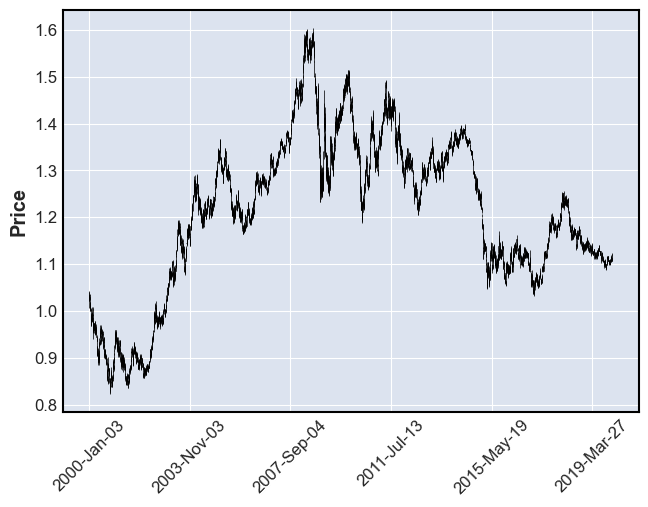

In [6]:
mpf.plot(df)

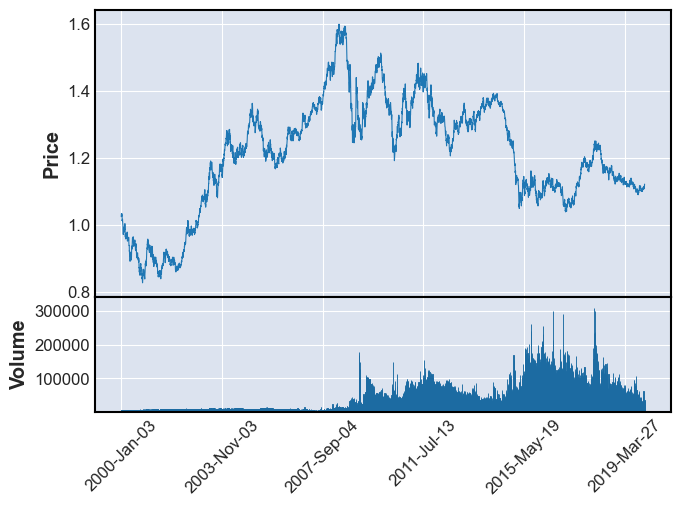

In [7]:
mpf.plot(df,type='line',volume=True)

C:\Users\27722\AppData\Local\Temp\ipykernel_14636\1020262612.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(df['2019-03'],volume=True)


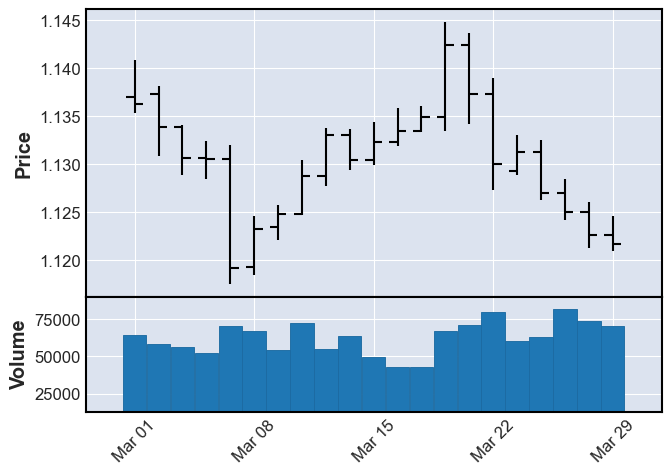

In [8]:
mpf.plot(df['2019-03'],volume=True)

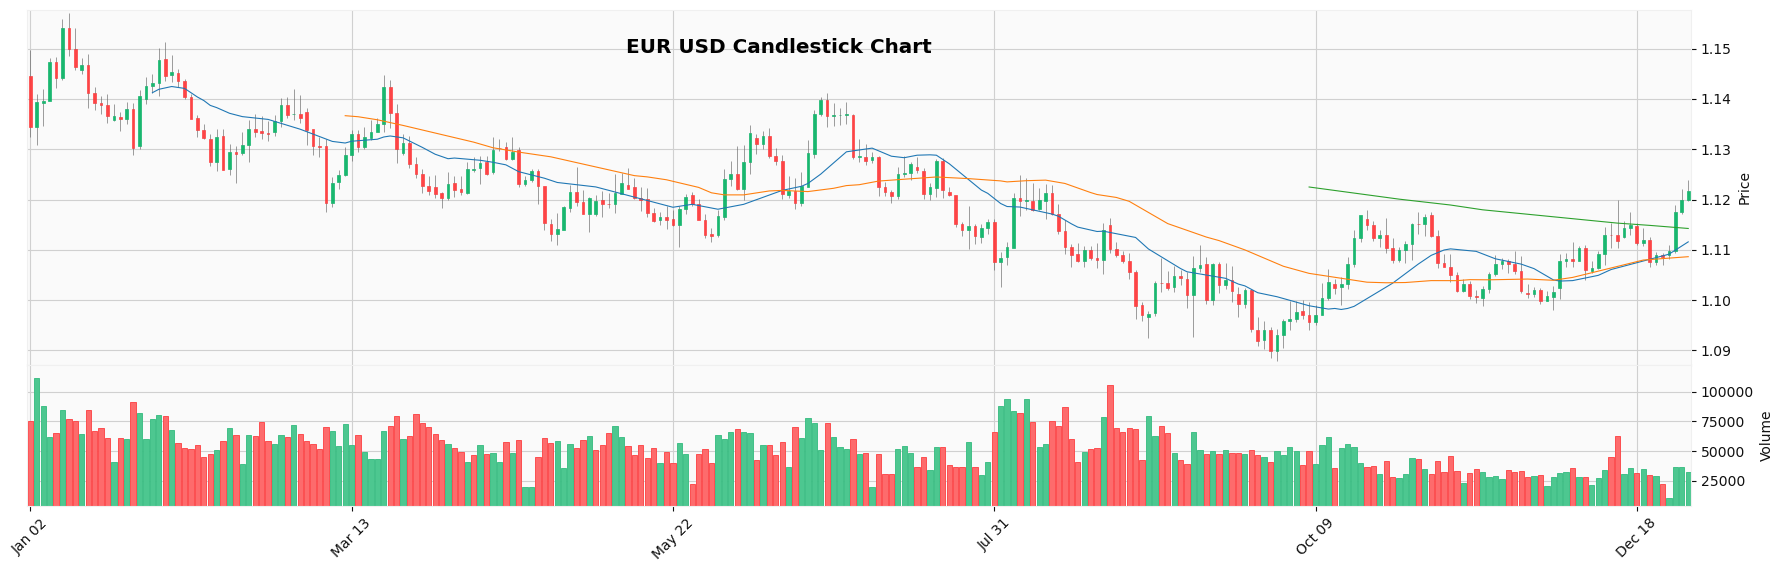

In [9]:
mpf.plot(df['2019':],figratio=(40,12),
         title='EUR USD Candlestick Chart',
         type='candle',mav=(20,50,200),
         style='yahoo',
         tight_layout=True,
         volume=True)

In [11]:
def calculate_technical_indicators(data):
    # Calculate 10-day EMA
    data['ema_10'] = ta.ema(data['Close'], length=10)
    
    # Calculate 40-day EMA
    data['ema_40'] = ta.ema(data['Close'], length=40)

    # Calculate 200-day SMA
    data['sma_200'] = ta.sma(data['Close'], length=200)

    # Calculate RSI (14)
    data['rsi_14'] = ta.rsi(data['Close'], length=14)
    data['rsi_7'] = ta.rsi(data['Close'], length=7)
    
    return data
calculate_technical_indicators(df)
df

,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7
Date,,,,,,,,,,
2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN
2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN
2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN
2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908
2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694
2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869


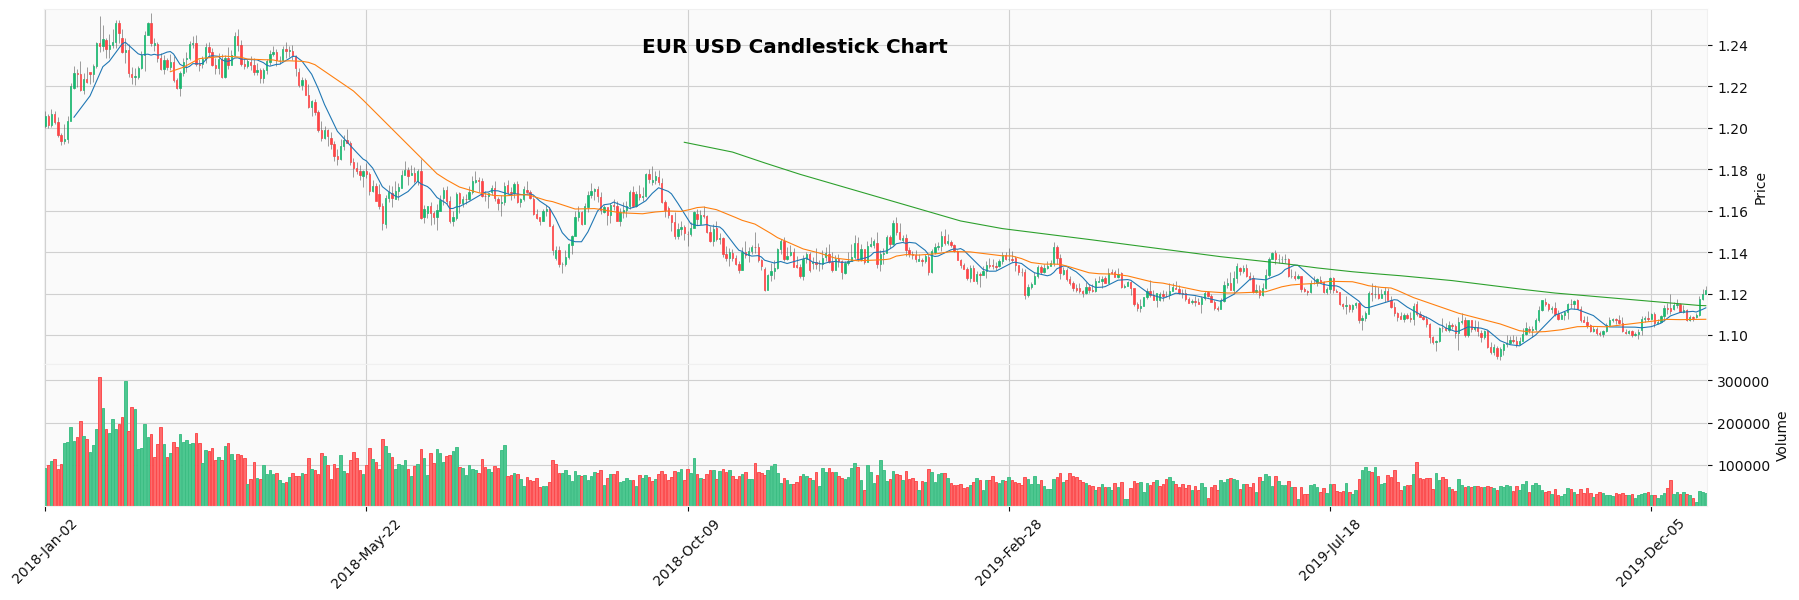

In [11]:
mpf.plot(df['2018':],figratio=(40,12),
         title='EUR USD Candlestick Chart',
         type='candle',
         mav=(10,40,200),
         style='yahoo',
         tight_layout=True,
         volume=True)


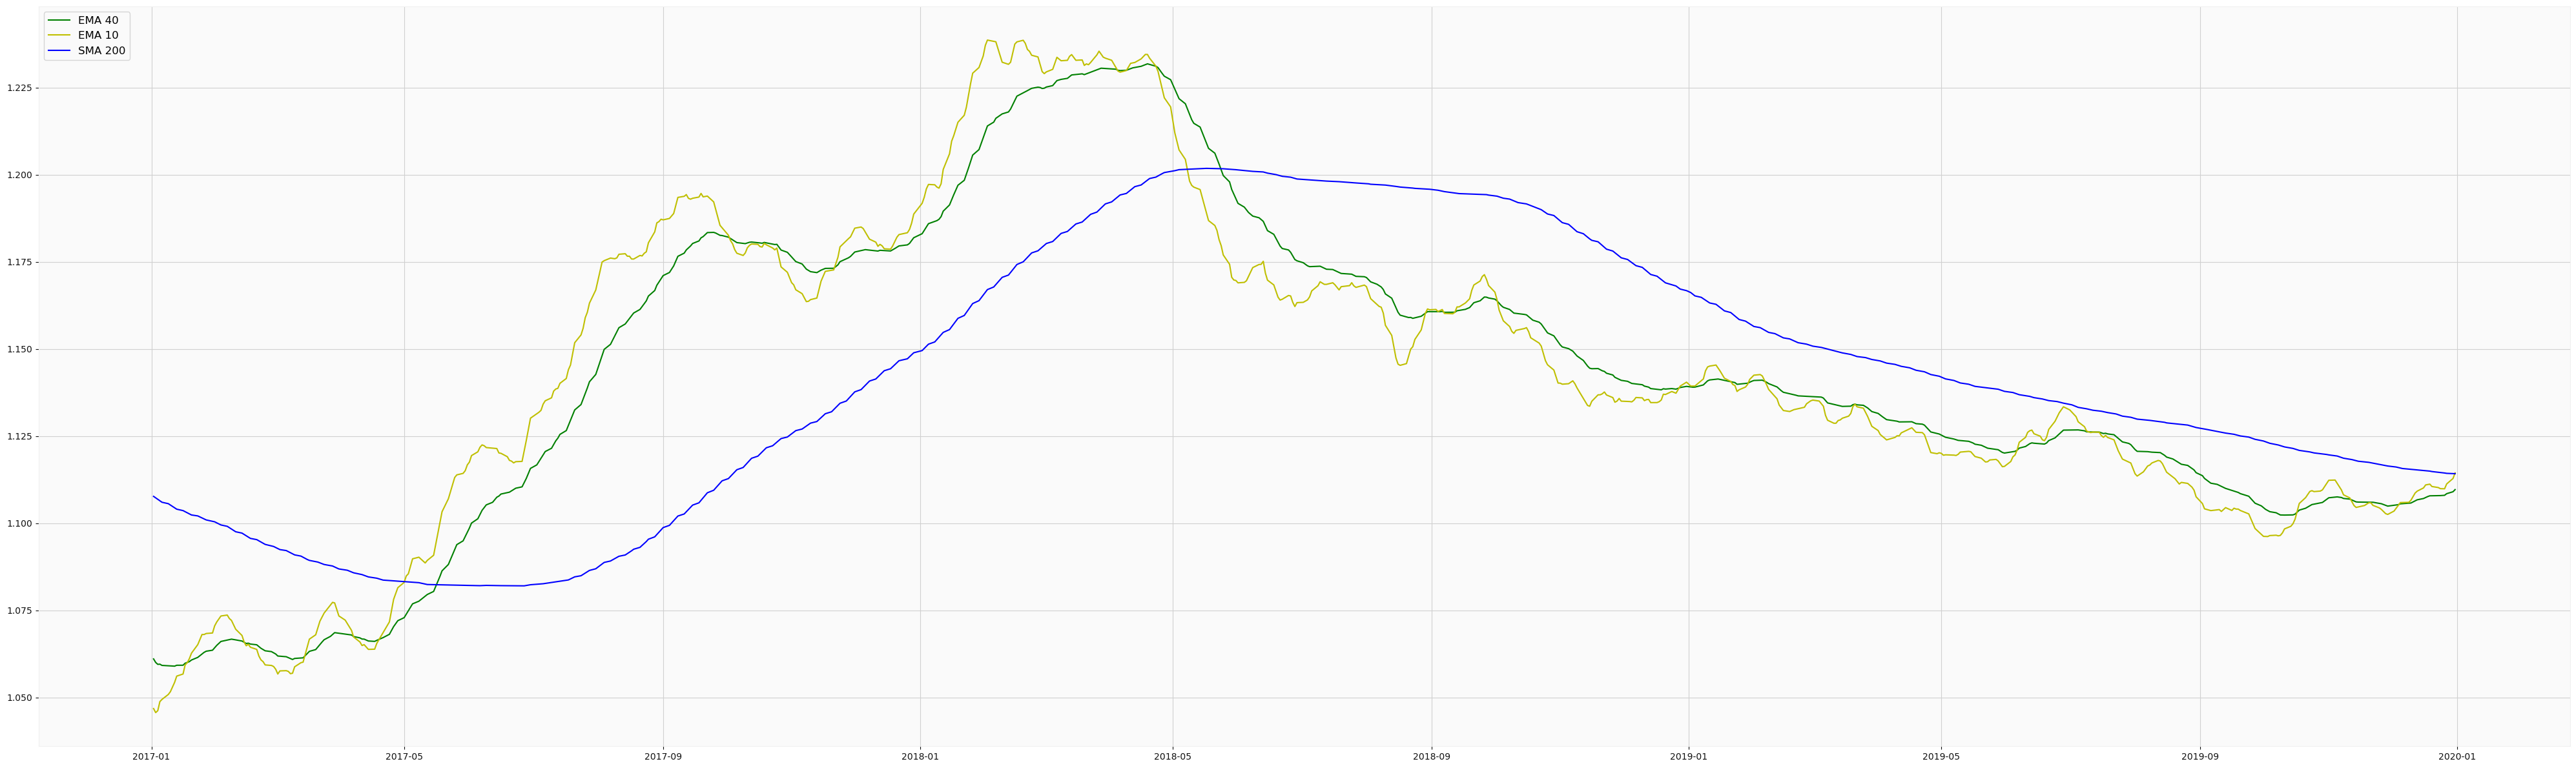

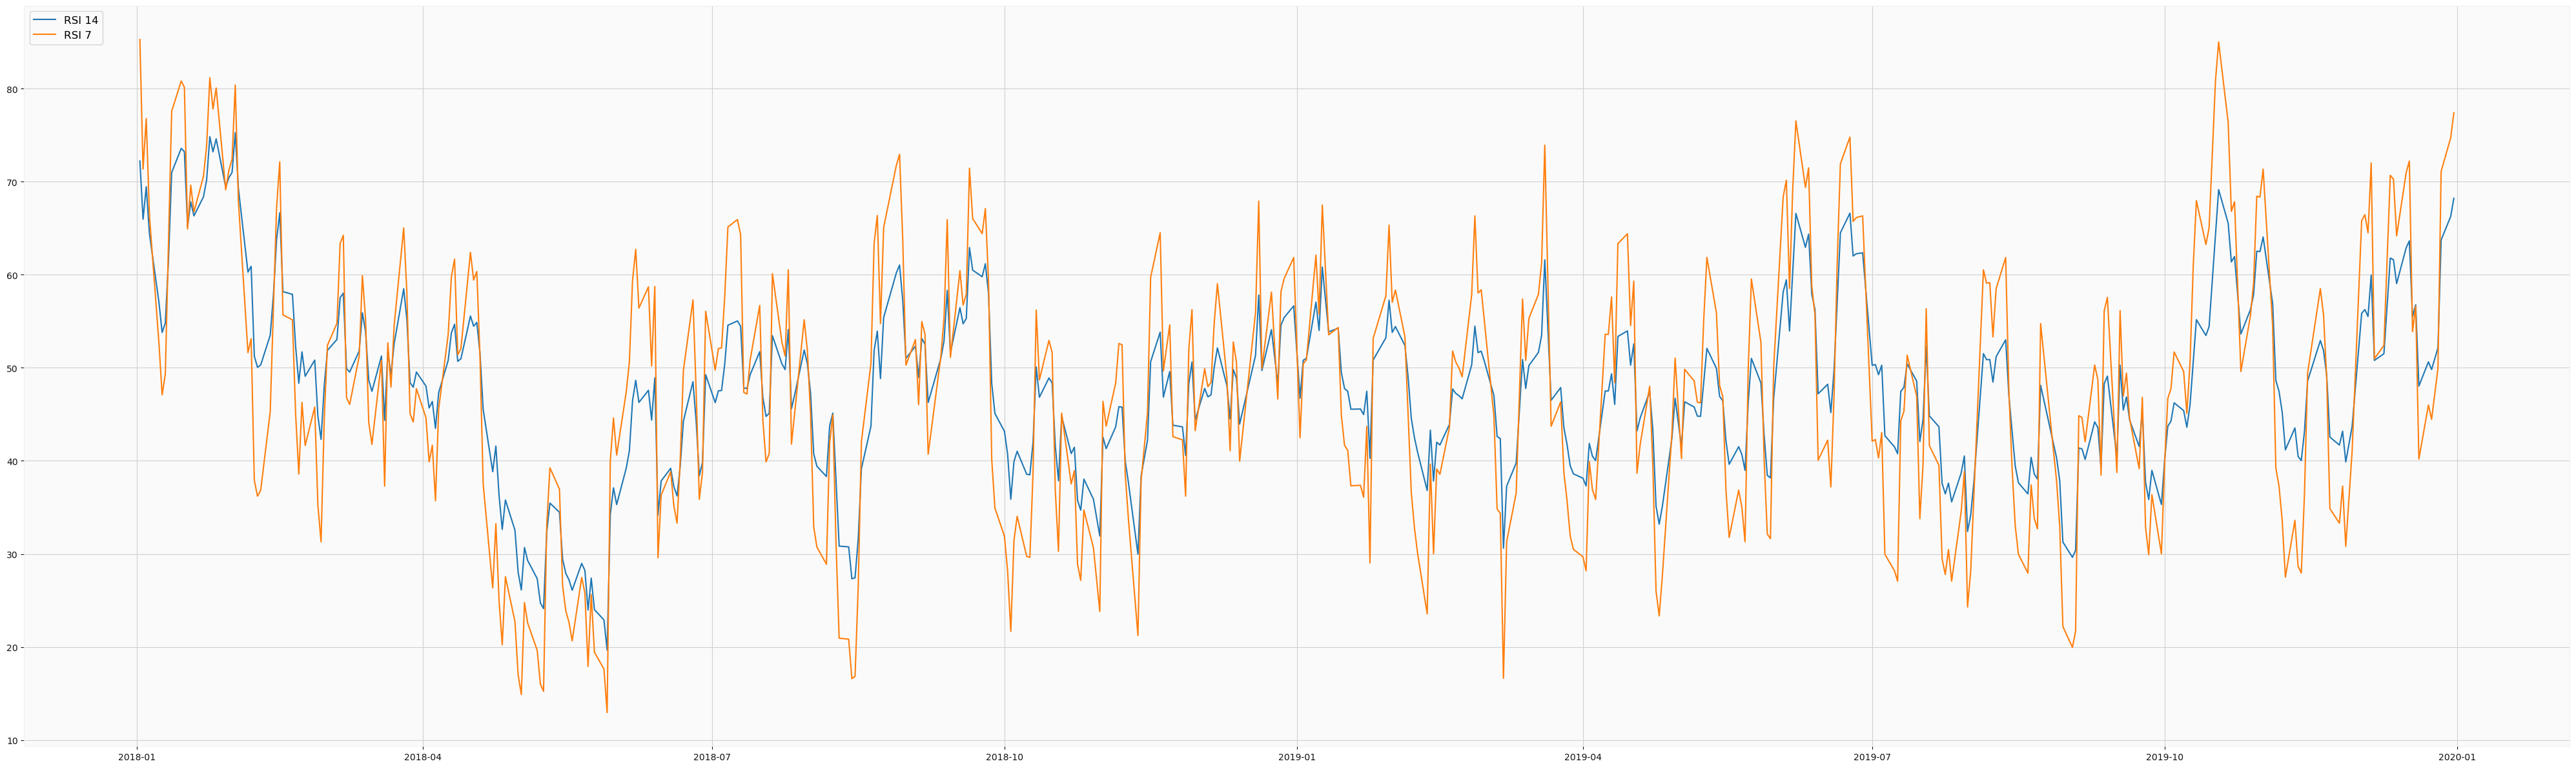

In [17]:
# Plotting the first set of indicators
plt.figure(figsize=(40, 12))
plt.plot(df['ema_40']['2017':], c='g', label='EMA 40')
plt.plot(df['ema_10']['2017':], c='y', label='EMA 10')
plt.plot(df['sma_200']['2017':], c='b', label='SMA 200')
plt.tight_layout()
plt.legend(loc='upper left', fontsize='large')  # You can adjust the location and font size
plt.show()

# Plotting the second set of indicators
plt.figure(figsize=(40, 12))
plt.plot(df['rsi_14']['2018':], label='RSI 14')
plt.plot(df['rsi_7']['2018':], label='RSI 7')
plt.tight_layout()
plt.legend(loc='upper left', fontsize='large')  # You can adjust the location and font size
plt.show()

In [20]:
# Create trend_state column
df['trend_state'] = np.where((df['Close'] > df['sma_200']) & (df['ema_40'] > df['sma_200']), True, False)

# Create signal column
df['signal'] = np.where((df['trend_state'] == True) & (df['ema_10'] > df['ema_40']), 'Buy',
                        np.where((df['trend_state'] == False) & (df['ema_10'] < df['ema_40']), 'Sell', 'Hold'))

# Create trade column
df['trade'] = 0

# Execute trades
for row in range(1, len(df)):
    if (df['trend_state'][row] == True) and (df['signal'][row] in ['Hold', 'Buy']):
        df['trade'][row] = df['Open'][row]
    elif (df['trend_state'][row] == False) and (df['signal'][row] in ['Hold', 'Sell']):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()

# Print the resulting DataFrame
df

C:\Users\27722\AppData\Local\Temp\ipykernel_14636\980123158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade'][row] = -df['Open'][row]


,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,trend_state,signal,trade,trade_pnl
Date,,,,,,,,,,,,,,
2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN,False,Hold,0.00000,0.00000
2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN,False,Hold,-1.02430,-1.02430
2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN,False,Hold,-1.02930,-2.05360
2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN,False,Hold,-1.03250,-3.08610
2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN,False,Hold,-1.03290,-4.11900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908,False,Hold,-1.10895,201.73510
2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694,False,Hold,-1.10900,200.62610
2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869,False,Hold,-1.10973,199.51637


In [21]:
df.signal.value_counts()

Buy     1918
Sell    1833
Hold    1448
Name: signal, dtype: int64

In [22]:
df.trend_state.value_counts()

False    2638
True     2561
Name: trend_state, dtype: int64

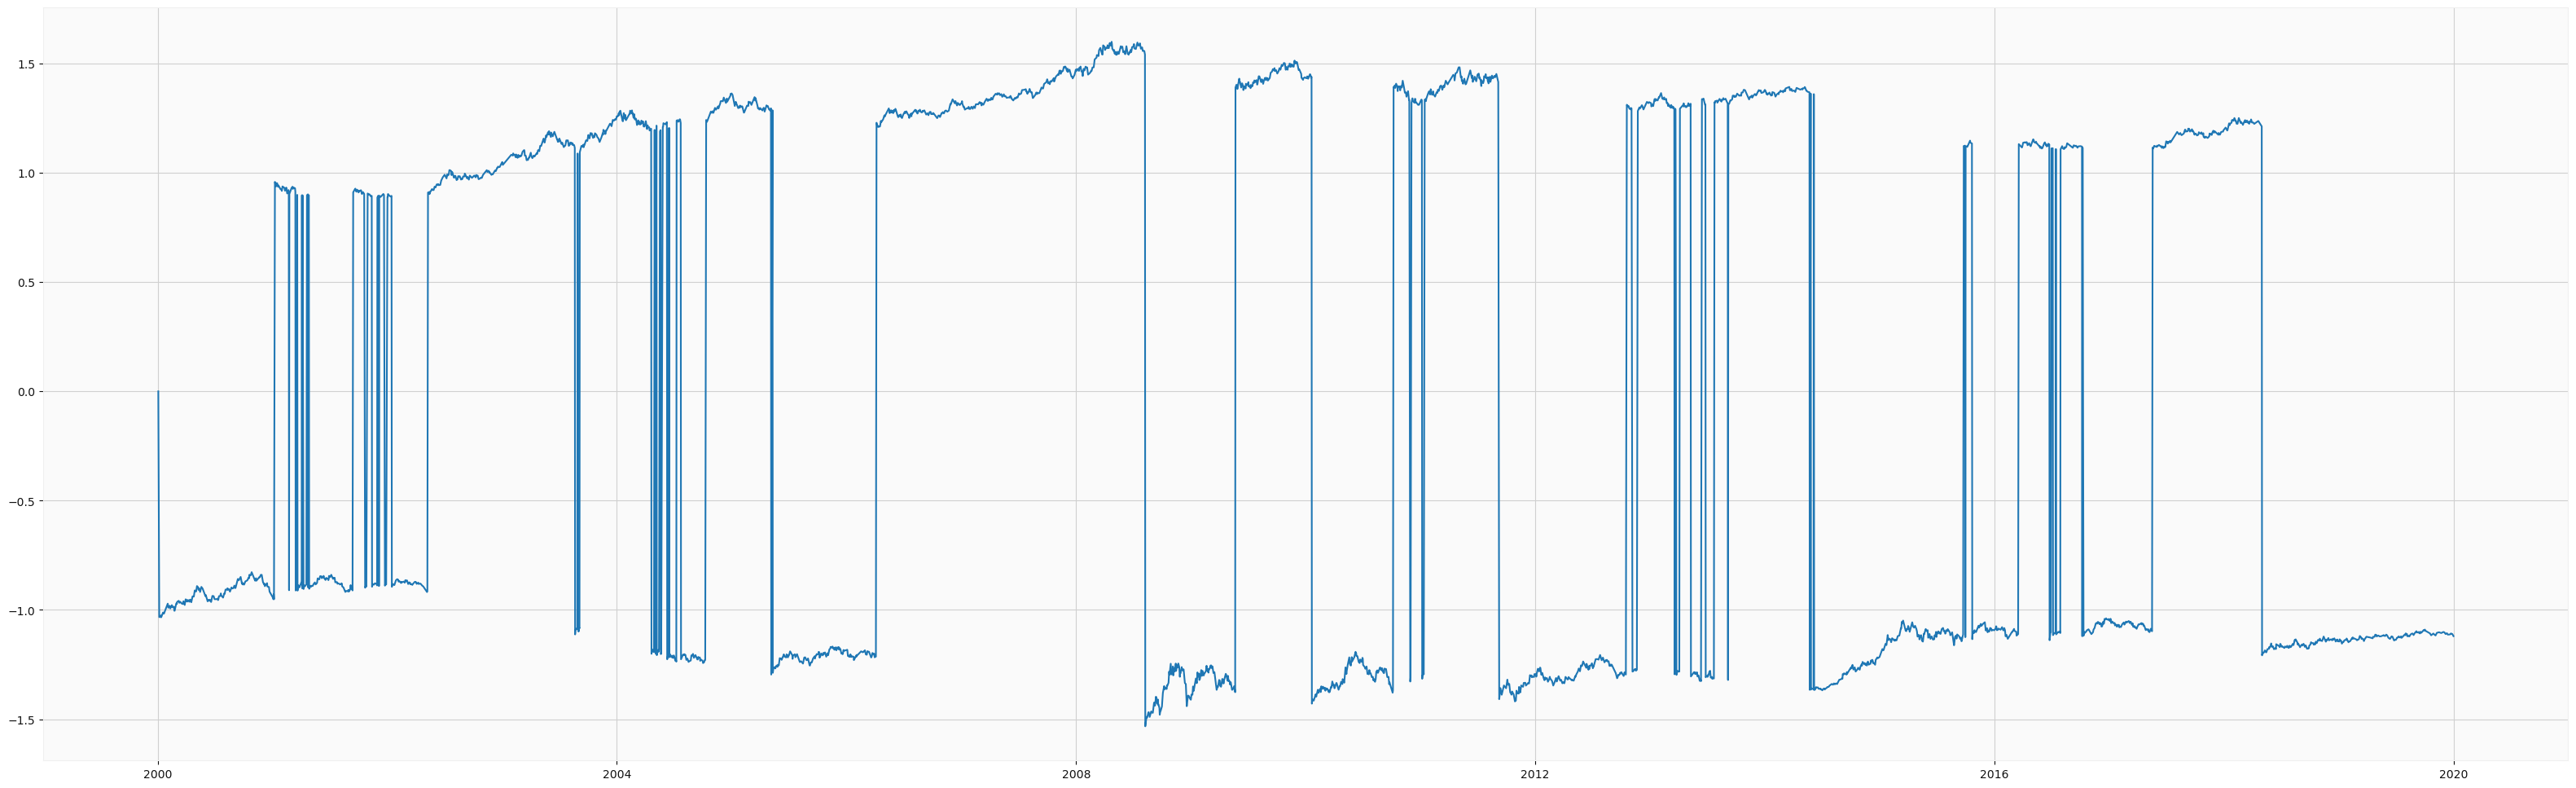

In [23]:
plt.figure(figsize=(40,12))
plt.plot(df['trade'])

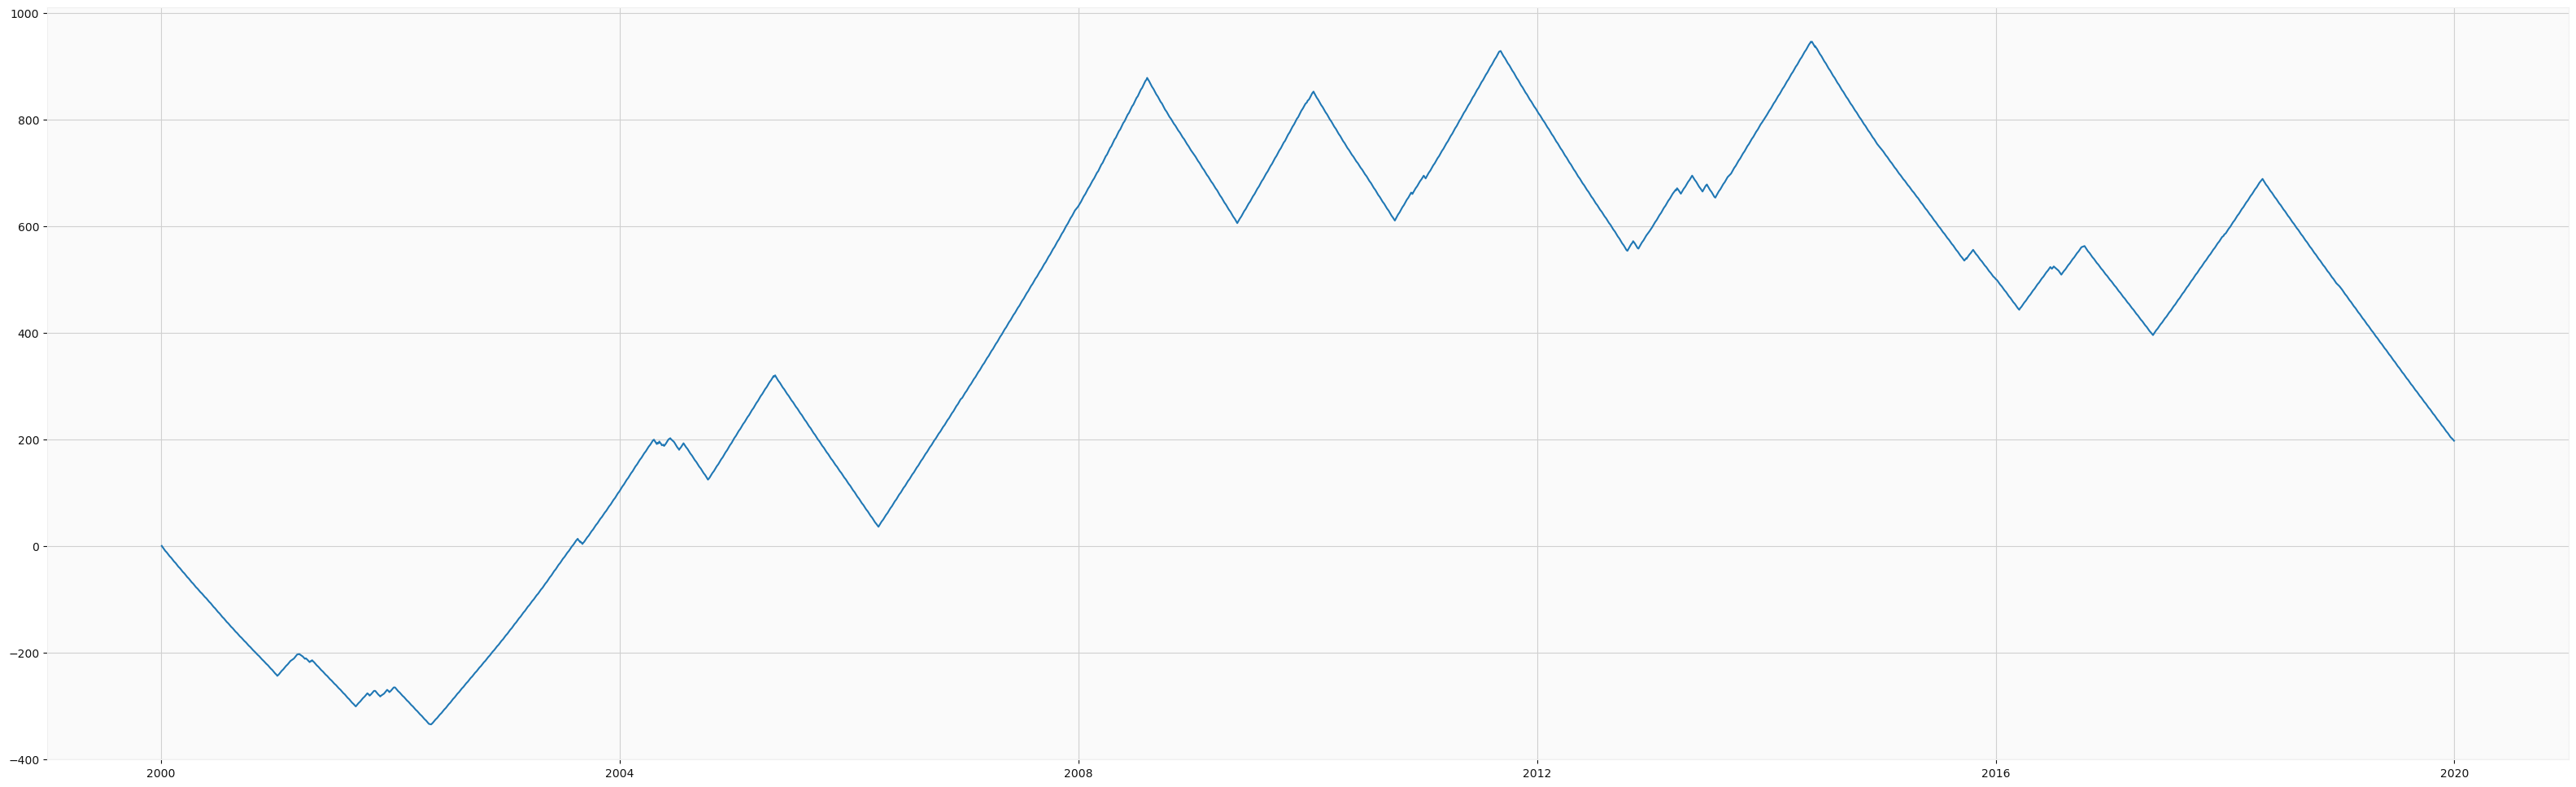

In [24]:
plt.figure(figsize=(40,12))
plt.plot(df['trade_pnl'])

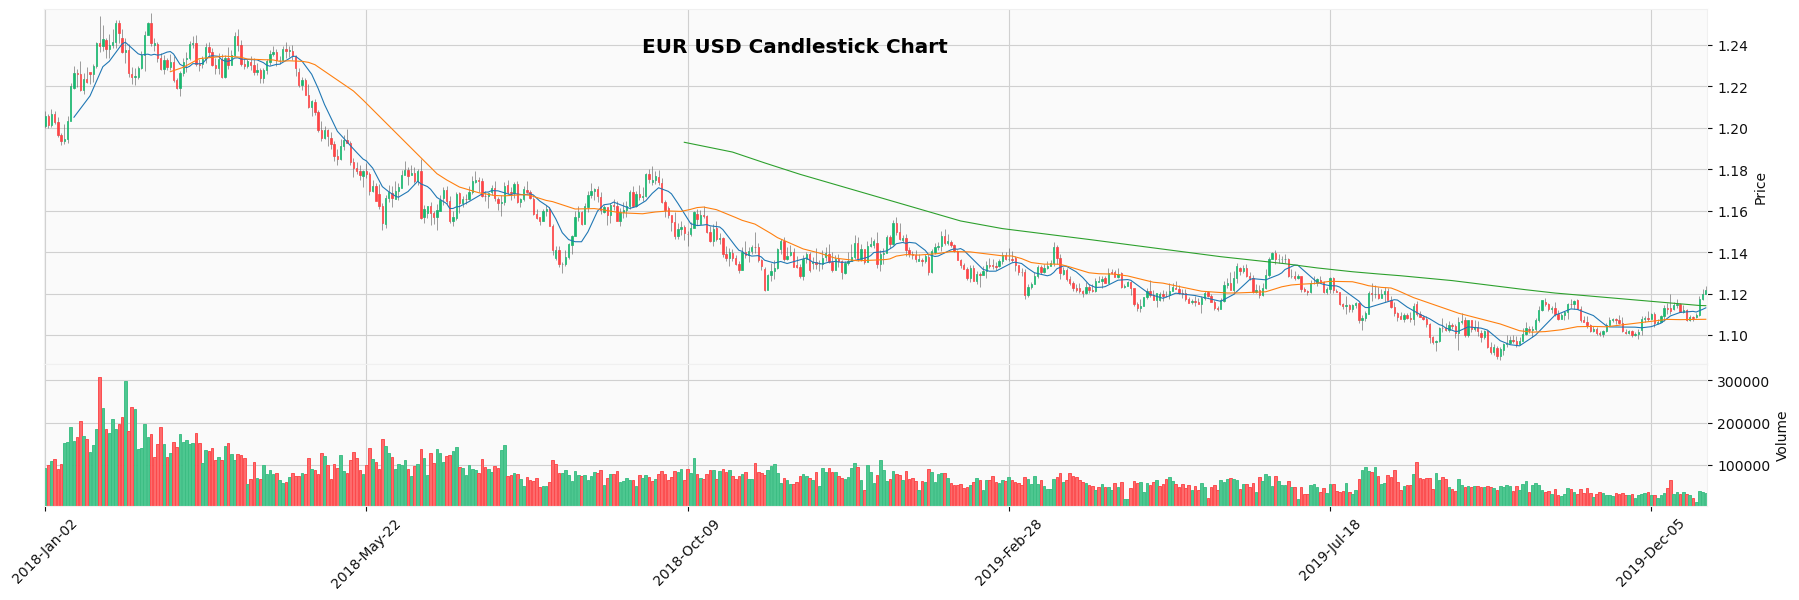

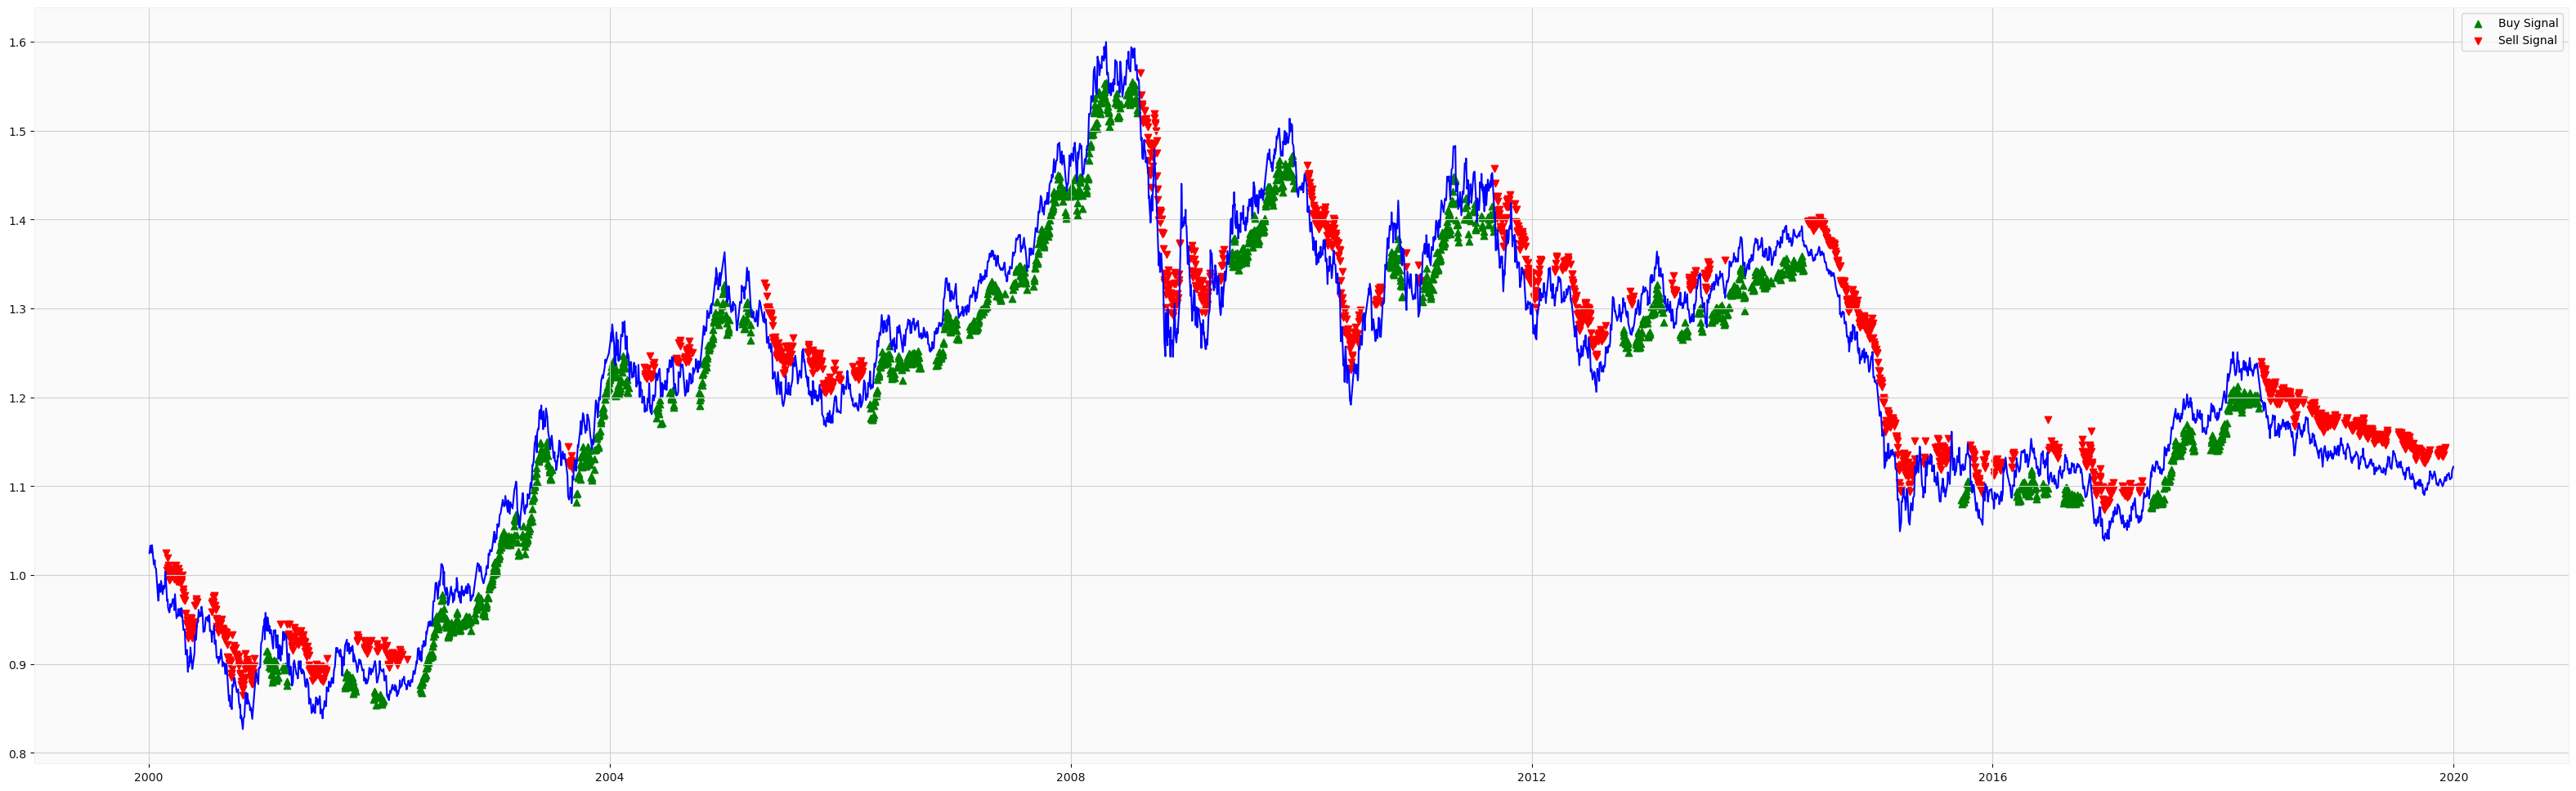

In [26]:
mpf.plot(df['2018':], figratio=(40, 12),
         title='EUR USD Candlestick Chart',
         type='candle',
         mav=(10, 40, 200),
         style='yahoo',
         tight_layout=True,
         volume=True)

plt.figure(figsize=(40,12))
plt.plot(df['Close'],c='b')
# Add arrows for buy signals
buy_signals = df[df['signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['Low'] - 0.02 * df['Close'].max(), marker='^', color='g', label='Buy Signal')

# Add arrows for sell signals
sell_signals = df[df['signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['High'] + 0.02 * df['Close'].max(), marker='v', color='r', label='Sell Signal')

# Show legend
plt.legend()

# Show the plot
plt.show()

C:\Users\27722\AppData\Local\Temp\ipykernel_14636\866726364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade'][row] = -df['Open'][row]
c:\Users\27722\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


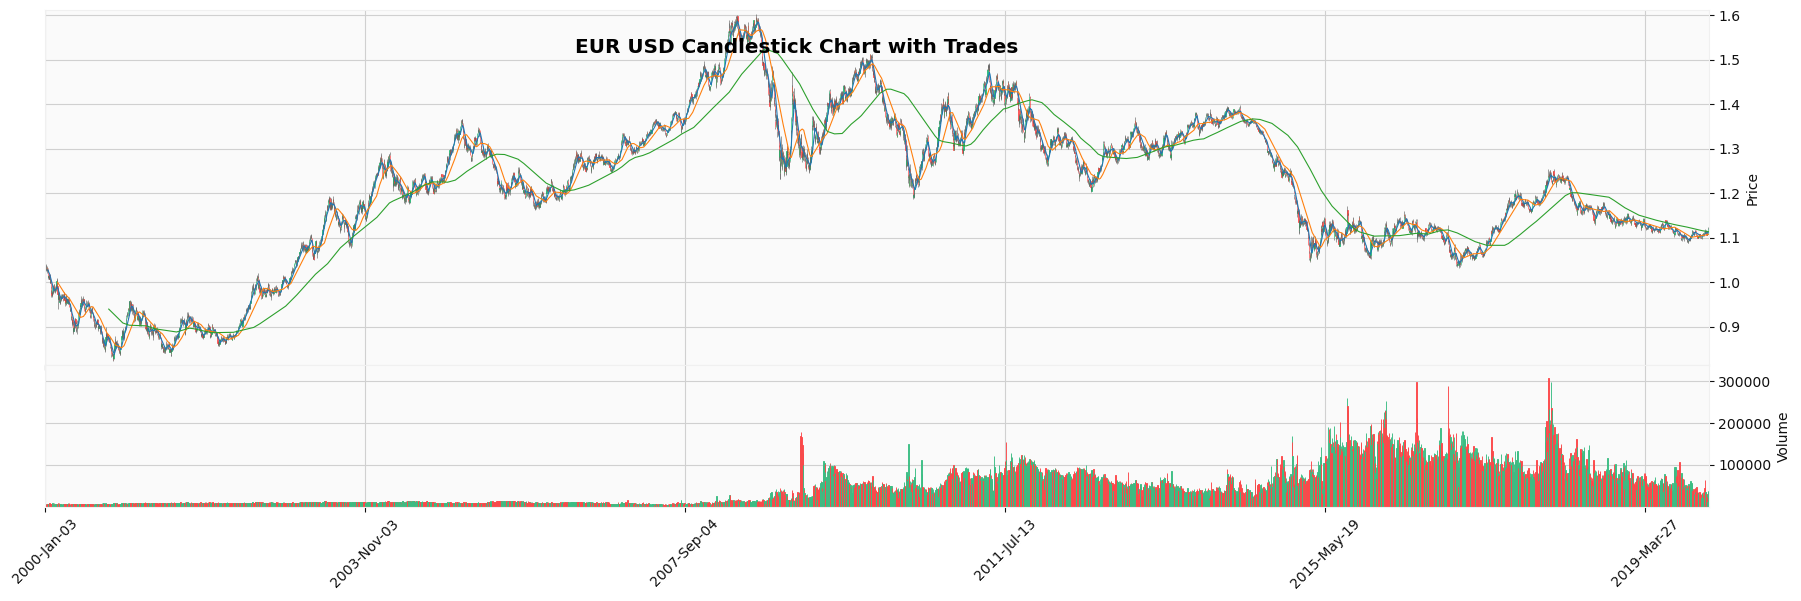

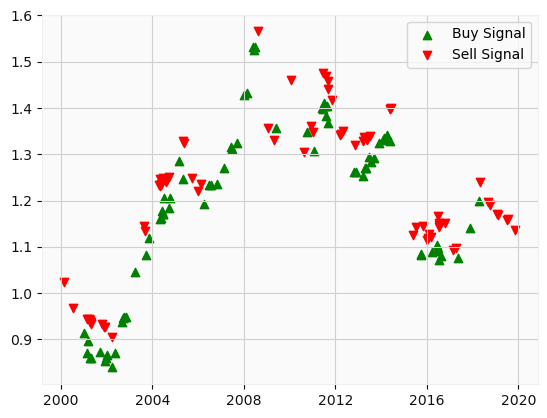

In [28]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

# Assuming you have 'df', 'trend_state', 'signal' columns from the previous code

# Create trade column
df['trade'] = 0

# Execute trades
for row in range(1, len(df)):
    if (df['signal'][row] == 'Buy') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = df['Open'][row]
    elif (df['signal'][row] == 'Sell') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]) and (df['trade'][row - 1] != 0):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()

# Plot candlestick chart with arrows for trades
mpf.plot(df, figratio=(40, 12),
         title='EUR USD Candlestick Chart with Trades',
         type='candle',
         mav=(10, 40, 200),
         style='yahoo',
         tight_layout=True,
         volume=True)


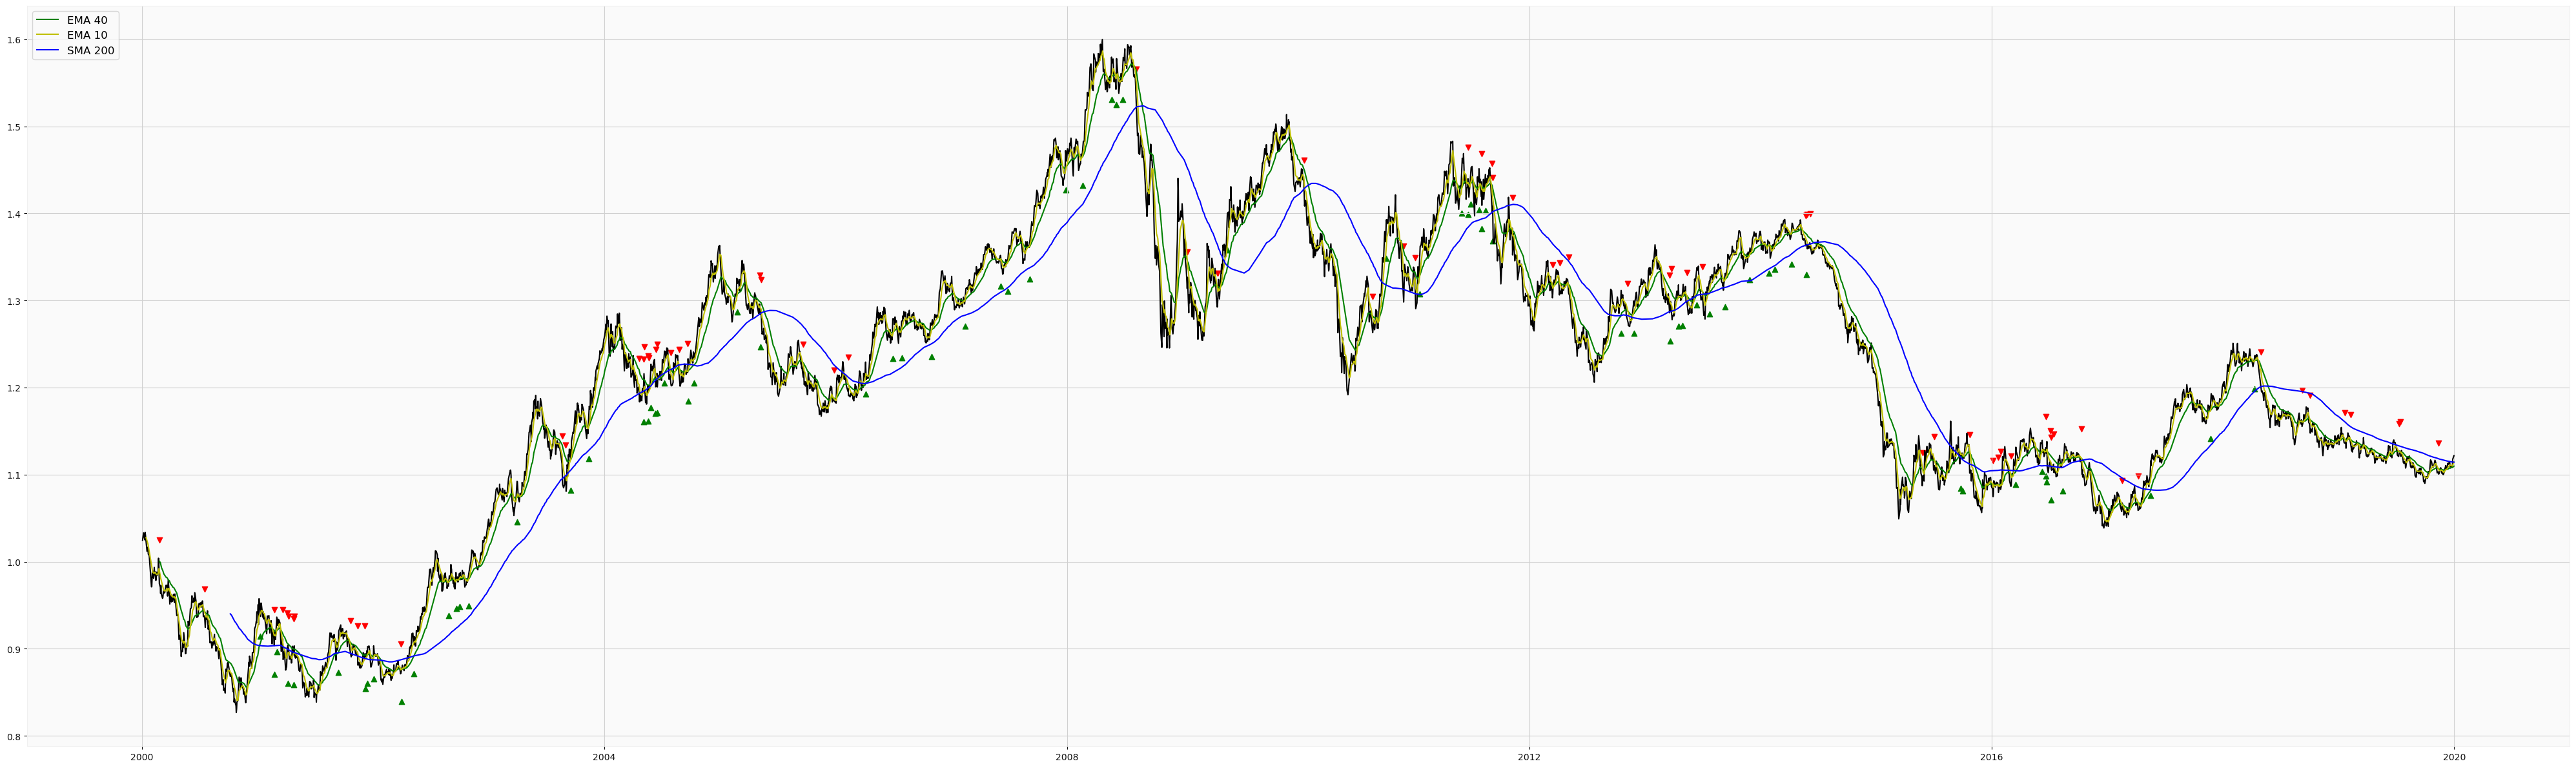

In [38]:

plt.figure(figsize=(40,12))
plt.plot(df['Close'],c='black')
plt.plot(df['ema_40'], c='g', label='EMA 40')
plt.plot(df['ema_10'], c='y', label='EMA 10')
plt.plot(df['sma_200'], c='b', label='SMA 200')
plt.tight_layout()
plt.legend(loc='upper left', fontsize='large')  # You can adjust the location and font size

# Add arrows for buy signals
buy_signals = df[df['trade'] > 0]
plt.scatter(buy_signals.index, buy_signals['Low'] - 0.02 * df['Close'].max(), marker='^', color='g', label='Buy Signal')

# Add arrows for sell signals
sell_signals = df[df['trade'] < 0]
plt.scatter(sell_signals.index, sell_signals['High'] + 0.02 * df['Close'].max(), marker='v', color='r', label='Sell Signal')

# Show the plot
plt.show()


In [29]:
df['trade_pnl']

Date
2000-01-03    0.00000
2000-01-04    0.00000
2000-01-05    0.00000
2000-01-06    0.00000
2000-01-07    0.00000
               ...   
2019-12-24    4.62972
2019-12-26    4.62972
2019-12-27    4.62972
2019-12-30    4.62972
2019-12-31    4.62972
Name: trade_pnl, Length: 5199, dtype: float64

In [30]:
df['trade'] = 0
df['position'] = 0
df['capital'] = 0

for row in range(1, len(df)):
    if (df['signal'][row] == 'Buy') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = df['Open'][row]
    elif (df['signal'][row] == 'Sell') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]) and (df['trade'][row - 1] != 0):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate position and capital
df['position'] = df['trade'].cumsum()
df['capital'] = df['position'] * df['Close']

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()
df[['Close', 'trade', 'position', 'capital']]


C:\Users\27722\AppData\Local\Temp\ipykernel_14636\1271156639.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade'][row] = -df['Open'][row]


,Close,trade,position,capital
Date,,,,
2000-01-03,1.02460,0.0,0.00000,0.000000
2000-01-04,1.02920,0.0,0.00000,0.000000
2000-01-05,1.03260,0.0,0.00000,0.000000
2000-01-06,1.03300,0.0,0.00000,0.000000
2000-01-07,1.02980,0.0,0.00000,0.000000
...,...,...,...,...
2019-12-24,1.10851,0.0,4.62972,5.132091
2019-12-26,1.10974,0.0,4.62972,5.137785
2019-12-27,1.11760,0.0,4.62972,5.174175


In [31]:
total_trades = len(df[df['trade'] != 0])
successful_trades = len(df[df['trade_pnl'] > 0])

if total_trades > 0:
    success_percentage = (successful_trades / total_trades) * 100
else:
    success_percentage = 0

print(f"Total Trades: {total_trades}")
print(f"Successful Trades: {successful_trades}")
print(f"Percentage of Successful Trades: {success_percentage:.2f}%")

Total Trades: 149
Successful Trades: 4374
Percentage of Successful Trades: 2935.57%


In [32]:
df

,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,trend_state,signal,trade,trade_pnl,position,capital
Date,,,,,,,,,,,,,,,,
2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN,False,Hold,0.0,0.00000,0.00000,0.000000
2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN,False,Hold,0.0,0.00000,0.00000,0.000000
2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN,False,Hold,0.0,0.00000,0.00000,0.000000
2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN,False,Hold,0.0,0.00000,0.00000,0.000000
2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN,False,Hold,0.0,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908,False,Hold,0.0,4.62972,4.62972,5.132091
2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694,False,Hold,0.0,4.62972,4.62972,5.137785
2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869,False,Hold,0.0,4.62972,4.62972,5.174175


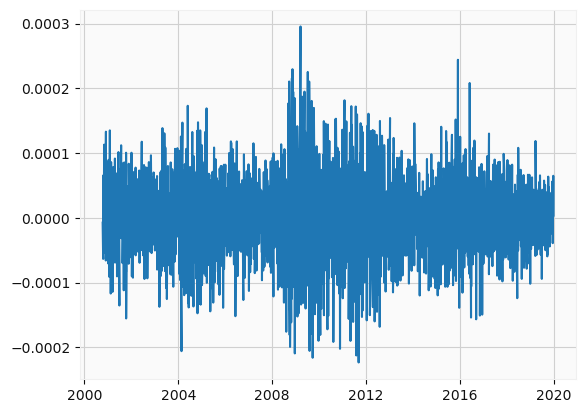

In [42]:
plt.plot(df['sma_200'].diff().diff())

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Sample data (replace this with your own dataset)
data = pd.DataFrame({
    'Date': pd.date_range('2023-01-01', '2023-01-10'),
    'Open': [100, 105, 95, 102, 98, 103, 97, 101, 99, 104],
    'High': [110, 112, 100, 105, 104, 108, 103, 105, 102, 110],
    'Low': [95, 100, 92, 97, 94, 99, 94, 97, 96, 100],
    'Close': [105, 102, 98, 101, 100, 105, 99, 103, 101, 108]
})

# Create a candlestick trace
trace = go.Candlestick(x=data['Date'],
                       open=data['Open'],
                       high=data['High'],
                       low=data['Low'],
                       close=data['Close'])

# Create a layout
layout = go.Layout(title='Candlestick Chart', xaxis=dict(title='Date'), yaxis=dict(title='Price'))

# Create a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()



In [ ]:
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
def calculate_technical_indicators(data):
    # Calculate 10-day EMA
    data['ema_10'] = ta.ema(data['Close'], length=10)
    
    # Calculate 40-day EMA
    data['ema_40'] = ta.ema(data['Close'], length=40)

    # Calculate 200-day SMA
    data['sma_200'] = ta.sma(data['Close'], length=200)

    # Calculate RSI (14)
    data['rsi_14'] = ta.rsi(data['Close'], length=14)
    data['rsi_7'] = ta.rsi(data['Close'], length=7)
    
    return data
calculate_technical_indicators(df)
df
# Create trend_state column
df['trend_state'] = np.where((df['Close'] > df['sma_200']) & (df['ema_40'] > df['sma_200']), True, False)

# Create signal column
df['signal'] = np.where((df['trend_state'] == True) & (df['ema_10'] > df['ema_40']), 'Buy',
                        np.where((df['trend_state'] == False) & (df['ema_10'] < df['ema_40']), 'Sell', 'Hold'))

# Create trade column
df['trade'] = 0

# Execute trades
for row in range(1, len(df)):
    if (df['trend_state'][row] == True) and (df['signal'][row] in ['Hold', 'Buy']):
        df['trade'][row] = df['Open'][row]
    elif (df['trend_state'][row] == False) and (df['signal'][row] in ['Hold', 'Sell']):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()

# Print the resulting DataFrame
df
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

# Assuming you have 'df', 'trend_state', 'signal' columns from the previous code

# Create trade column
df['trade'] = 0

# Execute trades
for row in range(1, len(df)):
    if (df['signal'][row] == 'Buy') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = df['Open'][row]
    elif (df['signal'][row] == 'Sell') and (df['signal'][row - 1] == 'Hold') and (df['trade'][row - 1] == 0):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]) and (df['trade'][row - 1] != 0):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()

# Plot candlestick chart with arrows for trades
mpf.plot(df, figratio=(40, 12),
         title='EUR USD Candlestick Chart with Trades',
         type='candle',
         mav=(10, 40, 200),
         style='yahoo',
         tight_layout=True,
         volume=True)


In [13]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import pandas_ta as ta
import numpy as np

# Sample data (replace this with your own dataset)
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate technical indicators
df = calculate_technical_indicators(df)

# Create trend_state column
df['trend_state'] = np.where((df['Close'] > df['sma_200']) & (df['ema_40'] > df['sma_200']), True, False)

# Create signal column
df['signal'] = np.where((df['trend_state'] == True) & (df['ema_10'] > df['ema_40']), 'Buy',
                        np.where((df['trend_state'] == False) & (df['ema_10'] < df['ema_40']), 'Sell', 'Hold'))

# Create trade column
df['trade'] = 0

# Execute trades
for row in range(1, len(df)):
    if (df['trend_state'][row] == True) and (df['signal'][row] in ['Hold', 'Buy']):
        df['trade'][row] = df['Open'][row]
    elif (df['trend_state'][row] == False) and (df['signal'][row] in ['Hold', 'Sell']):
        df['trade'][row] = -df['Open'][row]
    elif (df['signal'][row] != df['signal'][row - 1]):
        df['trade'][row] = -df['trade'][row - 1]

# Calculate cumulative sum to get the trade P&L
df['trade_pnl'] = df['trade'].cumsum()

# Create Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df.index.min(),
        end_date=df.index.max(),
        display_format='YYYY-MM-DD'
    ),
    dcc.Graph(id='candlestick-chart')
])

# Callback to update the candlestick chart based on selected date range
@app.callback(
    Output('candlestick-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_chart(start_date, end_date):
    filtered_data = df[(df.index >= start_date) & (df.index <= end_date)]

    # Candlestick Chart
    trace_candlestick = go.Candlestick(x=filtered_data.index,
                                       open=filtered_data['Open'],
                                       high=filtered_data['High'],
                                       low=filtered_data['Low'],
                                       close=filtered_data['Close'],
                                       name='Candlestick')

    # Trades
    trace_trades = go.Scatter(x=filtered_data.index,
                             y=filtered_data['trade_pnl'],
                             mode='markers',
                             marker=dict(color='black', size=8, symbol='triangle-up'),
                             name='Trades')

    layout_candlestick = go.Layout(title='Candlestick Chart with Trades', xaxis=dict(title='Date'), yaxis=dict(title='Price'))

    return {'data': [trace_candlestick, trace_trades], 'layout': layout_candlestick}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\27722\AppData\Local\Temp\ipykernel_18828\3202468736.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'layout_candlestick' is not defined



In [14]:
import pandas as pd
import pandas_ta as ta

raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

class Indicators:
    def __init__(self, data):
        self.data = data
        self.calculate_numerical_indicators()
        self.calculate_levels()
        self.detect_candlestick_patterns()

    def calculate_numerical_indicators(self):
        # Calculate numerical indicators
        self.data['ema_10'] = ta.ema(self.data['Close'], length=10)
        self.data['ema_40'] = ta.ema(self.data['Close'], length=40)
        self.data['sma_200'] = ta.sma(self.data['Close'], length=200)
        self.data['rsi_14'] = ta.rsi(self.data['Close'], length=14)
        self.data['rsi_7'] = ta.rsi(self.data['Close'], length=7)
        # Add more indicators as needed

    def calculate_levels(self):
        # Calculate support and resistance levels
        # Placeholder implementation, you can customize this part
        self.data['support'] = 0
        self.data['resistance'] = 0
        # Calculate 52-week high/low
        self.data['52week_high'] = self.data['High'].rolling(window=252).max()
        self.data['52week_low'] = self.data['Low'].rolling(window=252).min()
        # Calculate 20-week support/resistance levels
        self.data['20week_high'] = self.data['High'].rolling(window=100).max()
        self.data['20week_low'] = self.data['Low'].rolling(window=100).min()

    def detect_candlestick_patterns(self):
        # Detect candlestick patterns
        # Placeholder implementation, you can customize this part
        self.data['candlestick_pattern'] = 'Neutral'
        # Add logic to detect candlestick patterns

# Example usage:
# Assuming 'df' is your DataFrame with 'Open', 'High', 'Low', 'Close' columns
indicators = Indicators(df)

# Access the DataFrame with calculated indicators
df_with_indicators = indicators.data
df_with_indicators


,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,support,resistance,52week_high,52week_low,20week_high,20week_low,candlestick_pattern
Date,,,,,,,,,,,,,,,,,
2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Neutral
2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Neutral
2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Neutral
2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Neutral
2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908,0,0,1.15698,1.0879,1.11993,1.09810,Neutral
2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694,0,0,1.15698,1.0879,1.11993,1.09810,Neutral
2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869,0,0,1.15698,1.0879,1.11993,1.09810,Neutral


In [15]:
df_with_indicators.support.value_counts()

0    5199
Name: support, dtype: int64

In [19]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import pandas_ta as ta

# Sample data (replace this with your own dataset)
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

class Indicators:
    def __init__(self, data):
        self.data = data
        self.calculate_numerical_indicators()
        self.calculate_levels()

    def calculate_numerical_indicators(self):
        # Calculate numerical indicators
        self.data['ema_10'] = ta.ema(self.data['Close'], length=10)
        self.data['ema_40'] = ta.ema(self.data['Close'], length=40)
        self.data['sma_200'] = ta.sma(self.data['Close'], length=200)
        self.data['rsi_14'] = ta.rsi(self.data['Close'], length=14)
        self.data['rsi_7'] = ta.rsi(self.data['Close'], length=7)

    def calculate_levels(self):
        # Calculate support and resistance levels
        # Placeholder implementation, you can customize this part
        self.data['support'] = 0
        self.data['resistance'] = 0
        # Calculate 52-week high/low
        self.data['52week_high'] = self.data['High'].rolling(window=252).max()
        self.data['52week_low'] = self.data['Low'].rolling(window=252).min()
        # Calculate 20-week support/resistance levels
        self.data['20week_high'] = self.data['High'].rolling(window=100).max()
        self.data['20week_low'] = self.data['Low'].rolling(window=100).min()

# Initialize indicators
indicators = Indicators(df)

# Create Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df.index.min(),
        end_date=df.index.max(),
        display_format='YYYY-MM-DD'
    ),
    dcc.Graph(id='candlestick-chart')
])

# Callback to update the candlestick chart based on selected date range
@app.callback(
    Output('candlestick-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_chart(start_date, end_date):
    filtered_data = df[(df.index >= start_date) & (df.index <= end_date)]

    # Candlestick Chart
    trace_candlestick = go.Candlestick(x=filtered_data.index,
                                       open=filtered_data['Open'],
                                       high=filtered_data['High'],
                                       low=filtered_data['Low'],
                                       close=filtered_data['Close'],
                                       name='Candlestick')

    # EMA and SMA Plot
    trace_ema_10 = go.Scatter(x=filtered_data.index, y=filtered_data['ema_10'], mode='lines', name='EMA 10')
    trace_ema_40 = go.Scatter(x=filtered_data.index, y=filtered_data['ema_40'], mode='lines', name='EMA 40')
    trace_sma_200 = go.Scatter(x=filtered_data.index, y=filtered_data['sma_200'], mode='lines', name='SMA 200')

    # Support and Resistance Levels
    trace_support = go.Scatter(x=filtered_data.index, y=filtered_data['52week_low'], mode='lines', name='Support', line=dict(color='green', width=1, dash='dash'))
    trace_resistance = go.Scatter(x=filtered_data.index, y=filtered_data['52week_high'], mode='lines', name='Resistance', line=dict(color='red', width=1, dash='dash'))

    layout = go.Layout(title='Candlestick Chart with EMA, SMA, Support, and Resistance',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Price'),
                       showlegend=True)

    return {'data': [trace_candlestick, trace_ema_10, trace_ema_40, trace_sma_200, trace_support, trace_resistance], 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
